In [2]:
import pandas as pd
import time
path = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'

data = pd.read_csv(path, sep=',')
data.drop(columns = ['CUST_ID', 'TENURE'], inplace=True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [12]:
contrato = pd.value_counts(data.TENURE, normalize=True) * 100
contrato

12    84.737430
11     4.078212
10     2.636872
6      2.279330
8      2.189944
7      2.122905
9      1.955307
Name: TENURE, dtype: float64

In [3]:
faltantes = data.isna().sum()
faltantes

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [21]:
media = data.MINIMUM_PAYMENTS.mean()
mediana = data.MINIMUM_PAYMENTS.median()

print(f'media:{round(media, 2)}, mediana:{round(mediana, 2)}')

media:864.21, mediana:312.34


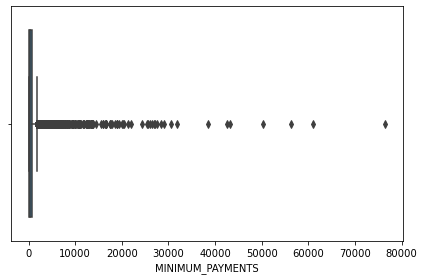

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data.MINIMUM_PAYMENTS)
plt.tight_layout()

In [27]:
limite_media = data.CREDIT_LIMIT.mean()
limite_mediana = data.CREDIT_LIMIT.median()

print(f'media:{limite_media}, mediana{limite_mediana}')

media:4494.449450364621, mediana3000.0


In [4]:
data.fillna(data.median(), inplace=True)

In [5]:
from sklearn.preprocessing import Normalizer
# O Knn funciona melhor com dados normalizados
values = Normalizer().fit_transform(data.values)

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
y_pred

array([1, 3, 1, ..., 1, 1, 0])

<h3>Como validar os clusters gerados ?</h3>

<h5>Metricas externas</h5>
<p> para validar as metricas externas precisamos ter os labels!</p>

<h5>Metricas Internas </h5>
<p>Compactaçao: exemplifica a distancia inter-clusters</p>
<p> Separaçao: Mede o quao bem separados os clusters estao uns dos outros</p>

In [7]:
# o Silhouette mede o quao similar um objeto e em comparacao com seus
# proprios clusters
# nao utiliza centroide nos cauculos
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
# shilhouette retrona valores entre -1, 1
# se o valor for positivo = bom resultado
print(f'O valor de Silhouette e: {round(silhouette, 3)}')

O valor de Silhouette e: 0.349


In [ ]:
# Indice Davie-bouldin
# medida de similaridade entre dois clusters I e J
# Utilizam centroides nos cauculos

In [8]:
# Quanto mais proximo de 0 melhor o valor
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0760267630682159


In [10]:
# Valor do calinski
# Utiliza centroides nos cauculos
# Cauculo das medidas e da variancia
calinski = metrics.calinski_harabasz_score(values, labels)

print(f'the calinski value is {round(calinski, 3)}')
# calinski => possivel

the calinski value is 3431.784


<p>Boa, agora temos 3 metricas com valores diferentes</p>
<ol>
    <li>Silhouette: Positivo = bom!</li>
    <li>Davies Bouldin: Quanto mais proximo de 0 Melhor!</li>
    <li>Calinski Harabaz: Quanto maior melhor!</li>
</ol>
<p>Mas precisamos ter uma base para medir os valores, 1 e proximo de 0?, a resposta e Depende!, e no exemplo de calinski, quanto maior melhor, mas 3431 e um bom valor? </p>

In [32]:
# Validaçao Relativa
def clusterning_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter = 300)
    labels = kmeans.fit_predict(dataset)
    
    s = round(metrics.silhouette_score(dataset, labels, 
                                       metric='euclidean'), 3)
    dbs = round(metrics.davies_bouldin_score(dataset, labels),3)
    calinski = round(metrics.calinski_harabasz_score(dataset, labels),3)
    
    #print(f'Com um total de {n_clusters}, temos s ={s}, d={d}, c={c}')
    return s, dbs, calinski        

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Validaçao Relativa
def clusterning_algorithm_for(n_clusters, init_clusters, dataset):
    s = []
    d = []
    c = []
    count = []
    clusters_number = 0
    
    for init_clusters in range(n_clusters):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter = 300)
        labels = kmeans.fit_predict(dataset)
        s.append(round(metrics.silhouette_score(values, labels,
                                                metric='euclidean'),4))
        d.append(round(metrics.davies_bouldin_score(values, labels),4))
        c.append(round(metrics.calinski_harabasz_score(values, labels),4))
        clusters_number = init_clusters 
        count.append(clusters_number)
        
    for i in count:
        print(f'Com um total de {count[i]},'
              f'temos s ={s[i]}, d={d[i]}, c={c[i]}')
    
    cluster_analysis = pd.DataFrame([count, s, d, c])
    cluster_analysis = cluster_analysis.transpose()
    cluster_analysis.rename(columns={0:'Numero_clusters', 1:'silhouette', 
                                     2:'David', 3:'Calinski'}, inplace=True)
    
    cluster_analysis['Numero_clusters'].astype(int)

    cluster_analysis.head()
    
    return cluster_analysis

In [17]:
teste = clusterning_algorithm_for(10, 1, values)

Com um total de 0,temos s =0.3515, d=1.1165, c=3019.1911
Com um total de 1,temos s =0.3516, d=1.115, c=3019.1611
Com um total de 2,temos s =0.3513, d=1.1174, c=3019.1285
Com um total de 3,temos s =0.3053, d=1.1559, c=3017.8219
Com um total de 4,temos s =0.3073, d=1.1417, c=3018.0895
Com um total de 5,temos s =0.3067, d=1.1453, c=3018.2845
Com um total de 6,temos s =0.3061, d=1.1469, c=3018.1788
Com um total de 7,temos s =0.3515, d=1.1164, c=3019.2023
Com um total de 8,temos s =0.3049, d=1.1584, c=3017.6211
Com um total de 9,temos s =0.3062, d=1.1468, c=3018.1939


In [18]:
teste.head(10)

,Numero_clusters,silhouette,David,Calinski
0,0.0,0.3515,1.1165,3019.1911
1,1.0,0.3516,1.1150,3019.1611
2,2.0,0.3513,1.1174,3019.1285
3,3.0,0.3053,1.1559,3017.8219
4,4.0,0.3073,1.1417,3018.0895
5,5.0,0.3067,1.1453,3018.2845
6,6.0,0.3061,1.1469,3018.1788
7,7.0,0.3515,1.1164,3019.2023
8,8.0,0.3049,1.1584,3017.6211
9,9.0,0.3062,1.1468,3018.1939


In [35]:
# Validaçao com valores aleatorios!
import numpy as np
random_data = np.random.rand(8950, 16)

s_random, db_random, calinski_random=clusterning_algorithm(5, random_data)
print(s_random, db_random, calinski_random)

0.04 3.491 301.653


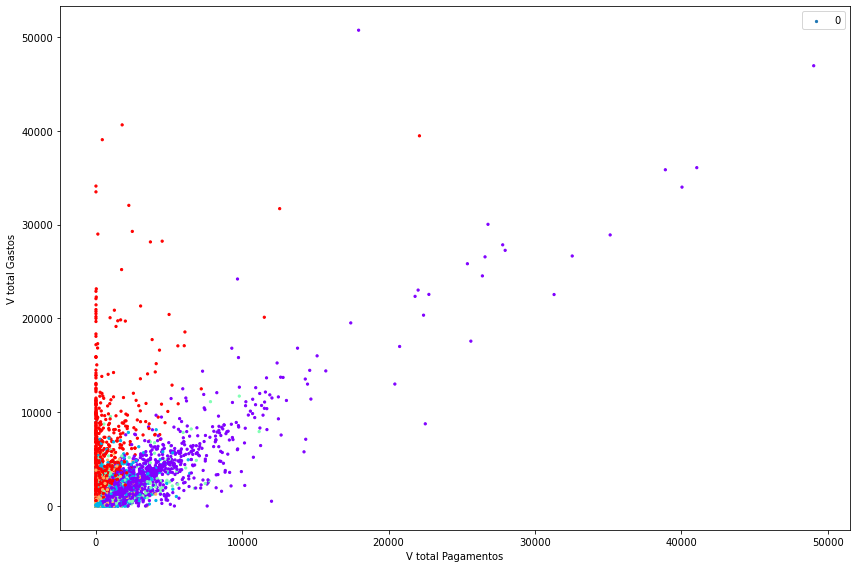

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(data['PURCHASES'],data['PAYMENTS'], 
            c=y_pred, s=5, cmap='rainbow')
plt.legend(labels=['0', '1', '2', '3', '4']
          , loc='best')
plt.xlabel('V total Pagamentos')
plt.ylabel('V total Gastos')
plt.tight_layout()

In [51]:
data.groupby("clusters").describe()

BALANCE                                                     \
           count         mean          std         min          25%   
clusters                                                              
0         1494.0  1118.998658  1627.007380    0.000000   212.520398   
1         3315.0   488.802028   936.433585    0.000000    24.078900   
2         1825.0  2949.582558  2565.494710  114.523682  1216.893766   
3         1315.0  2719.616192  2230.337145    1.691842  1035.647960   
4         1001.0  1748.854674  1987.975020    0.000000   486.170360   

                                                 BALANCE_FREQUENCY            \
                  50%          75%           max             count      mean   
clusters                                                                       
0          543.237203  1337.212684  19043.138560            1494.0  0.931343   
1           85.881798   448.965814   9630.367575            3315.0  0.780972   
2         1843.308668  4021.881912  18495.558550            1825.0  0.996860   
3         2080.312991  3782.283750  12856.152510            1315.0  0.906890   
4         1060.422892  2241.092286  14581.459140            1001.0  0.858535   

          ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
          ...              75%           max            count      mean   
clusters  ...                                                             
0         ...       531.787024  18621.013310           1494.0  0.282392   
1         ...       260.172137   3933.230932           3315.0  0.244951   
2         ...      1961.161822  76406.207520           1825.0  0.001062   
3         ...      1164.174894   8644.138069           1315.0  0.007450   
4         ...       931.105425  21235.065300           1001.0  0.129974   

                                                            
               std  min  25%       50%       75%       max  
clusters                                                    
0         0.369194  0.0  0.0  0.083333  0.567461  1.000000  
1         0.345886  0.0  0.0  0.000000  0.436507  1.000000  
2         0.013400  0.0  0.0  0.000000  0.000000  0.416667  
3         0.041141  0.0  0.0  0.000000  0.000000  0.600000  
4         0.198876  0.0  0.0  0.083333  0.166667  1.000000  

[5 rows x 128 columns]

In [53]:
centroids = kmeans.cluster_centers_
centroids

array([[1.55441288e-01, 2.45527380e-04, 4.45197805e-01, 2.57865614e-01,
        1.87505775e-01, 2.67051319e-02, 2.04941957e-04, 8.80988885e-05,
        1.51947090e-04, 9.54095447e-06, 1.73998170e-04, 6.18672007e-03,
        5.94079088e-01, 4.02613545e-01, 9.25336034e-02, 7.27583477e-05],
       [7.41435057e-02, 2.30598606e-04, 1.22644337e-01, 4.91336388e-02,
        7.36112623e-02, 2.02012160e-02, 1.72105136e-04, 3.41056055e-05,
        1.39398511e-04, 7.56585643e-06, 1.18718703e-04, 2.87194118e-03,
        9.43090102e-01, 1.54954100e-01, 5.72048927e-02, 7.55013476e-05],
       [5.34719561e-01, 3.07483975e-04, 9.40143076e-02, 4.50451970e-02,
        4.90841876e-02, 8.42618546e-02, 1.03569613e-04, 3.28730575e-05,
        7.70242320e-05, 3.86267235e-05, 6.70671828e-04, 2.24080860e-03,
        6.47510299e-01, 1.99941575e-01, 3.11248055e-01, 2.85575884e-07],
       [3.92225952e-01, 2.21961434e-04, 4.08966140e-02, 2.41375044e-02,
        1.67632013e-02, 4.69796685e-01, 4.57220814e-05, 1.602

## Selecionando as maiores variancias inter-clusters

In [57]:
# analisar quais caracteristicas melhor dividem os clusters
max = len(centroids[0])
for i in range(max):
    print(data.columns.values[i],"\n {:.4f}".format(centroids[:, i].var()))

BALANCE 
 0.0276
BALANCE_FREQUENCY 
 0.0000
PURCHASES 
 0.0219
ONEOFF_PURCHASES 
 0.0077
INSTALLMENTS_PURCHASES 
 0.0037
CASH_ADVANCE 
 0.0351
PURCHASES_FREQUENCY 
 0.0000
ONEOFF_PURCHASES_FREQUENCY 
 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
 0.0000
CASH_ADVANCE_FREQUENCY 
 0.0000
CASH_ADVANCE_TRX 
 0.0000
PURCHASES_TRX 
 0.0000
CREDIT_LIMIT 
 0.0210
PAYMENTS 
 0.0348
MINIMUM_PAYMENTS 
 0.0078
PRC_FULL_PAYMENT 
 0.0000


In [62]:
descri = data.groupby("clusters")['BALANCE', 'PURCHASES', 'CASH_ADVANCE',
                                 'CREDIT_LIMIT', 'PAYMENTS']

tamanho = descri.size()
descri = descri.mean()
descri['n_clientes'] = tamanho
descri.head()

C:\Users\caooc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clientes
clusters,,,,,,
0,1118.998658,3328.438133,186.010928,4044.718977,3050.885706,1494
1,488.802028,640.242015,126.097601,5178.415315,827.711487,3315
2,2949.582558,559.479945,573.495675,3730.000000,1050.324877,1825
3,2719.616192,251.530144,3004.448265,4782.091255,1008.915227,1315
4,1748.854674,531.250120,3064.439069,3914.956256,4961.223005,1001


<h3>Analise dos clusters gerados</h3>
<ol> 
    Cluster 0
    <p>Sao os clientes que mais gastam com compras, e pagamentos</p>
    <p></p>
    <li>Maior valor comp compras, com muita diferença dos outros grupos</li>
    <p></p>
    <li>Menor valor em Saques</li>
    <p></p>
    <li>Valor consideravel em pagamentos</li>
    
</ol>
<ol>
    Cluster 1
    <p> Maior limite de credito, Menos gastos, maior numero de clientes</p>
    <p></p>
    <li>Menor valor em gastos</li>
    <p></p>
    <li>Maior limite de credito</li>
    <p></p>
    <li>Menor valor em pagamentos</li>
</ol>
<ol>
    Cluster 2
    <p>Maiores gastos, Menor limite de credito , PIORES PAGADORES</p> 
    <p></p>
    <li>Maior valor em gastos</li>
    <p></p>
    <li>Menor limite de credito</li>
    <li> </li>
</ol>
<ol> 
    Cluster 3
    <p>clientes que tem um valor consideravel em gastos, e saques</p>
    <p></p>
    <li>Alto valor em compras gastos</li>
    <p></p>
    <li>Menor valor em compras</li>
    <p></p>
    <li>Valor consideravel em saques</li>
</ol>
<ol>
    Cluster 4
    <p>Clientes que mais sacam, e menos pagam, menor quantidade de clientes</p>
    <p></p>
    <li>Maior valor em saques</li>
    <p></p>
    <li>Maior valor em pagamentos</li>
</ol>

In [63]:
data.groupby('clusters')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,1494.0,0.282392,0.369194,0.0,0.0,0.083333,0.567461,1.000000
1,3315.0,0.244951,0.345886,0.0,0.0,0.000000,0.436507,1.000000
2,1825.0,0.001062,0.013400,0.0,0.0,0.000000,0.000000,0.416667
3,1315.0,0.007450,0.041141,0.0,0.0,0.000000,0.000000,0.600000
4,1001.0,0.129974,0.198876,0.0,0.0,0.083333,0.166667,1.000000
